<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# PG AI - Natural Language Processing and Speech Recognition
# Assisted Practice: Implement Text Processing Using Stemming and Regular Expression after Noise Removal and Convert It into List of Phrases

DESCRIPTION

Use regular expressions to work with messy tweets data: clean up the data, extract hashtags, analyze the most popular hashtags that occur along with a target hashtag (#economy).<br>
Problem Statement: Social media is a gold mine of information. Brands, governments, or anyone  can leverage their business with the help of the information contained. It can be information on the sentiments for a brand, or the themes being spoken about , or the associated trends for a particular hashtag. In this project, we   will work on the tweets on Twitter.<br>
We will find  other hashtags that occur frequently with our target hashtag. This will give us an understanding of which  other topics people are associating this hashtag with.<br>

### Domain: Social media
### Analysis to be done: Cleanup tweets and analyze top hashtags
### Content: 
### Dataset: ‘raw_tweets_economy.txt’

Dataset has no header. For each row, it has an index and then the tweet text.

Steps to perform:

Tweets data is generally very ill-formatted and contains URLs, user handles, retweet markers, etc. The data is not clean and it is difficult to extract the desired information. We will use regular expressions to clean up the tweets and then, use it to extract hashtags from the data. We will eliminate the target hashtag #economy, which is effectively a contextual stop word in this case. <br>

#### Tasks: 

    1. Load the tweets file using read_csv function from Pandas package. (Hint: provide the appropriate separator)
    2. Drop the column ‘Unnamed: 0’ and rename the column containing the text to ‘tweet’.
    3. Get the tweets into a list for easy text cleanup and manipulation.
    4. Normalize the case by  converting all text into lower case and assigning new variables. See first five tweets to confirm if we got the desired result.
    5. Using regular expressions, remove user handles. These begin with '@’.
        1. First, try removing user handle from the test string ‘@Rahim this course rocks! https://linkedin.com/in/rahim-baig’.
        2. Then, cleanup all the tweets once the function or pattern is decided. Check first five items to confirm we got the desired result.

    6. Using regular expressions, remove URLs:
        1. First, try removing URLs from the test string ‘@Rahim this course rocks! https://linkedin.com/in/rahim-baig’.
        2. Then, clean up all the tweets once the function or pattern is decided. Check first five items to confirm we got the desired result.

    7. Using regular expressions, extract only the hashtags from the tweets.  Remember, we have to analyze the most common hashtags in tweets.
        1. Extract hashtags from the sample string, ‘@Rahim, #food is #love’.
        2. Then, extract from all the tweets once the pattern is decided. Check the first five records to confirm the result.

    8. Counting the most common hashtags:
        1. First, collate all the tags into one single list to conveniently pass on to a counter.
        2. Remove the contextual stop word i.e. ‘#economy’. This will  be dominant, as this is the target hashtag. We need to analyze the other hashtags.
        3. Use a counter to count the most common hashtags in the data.
        4. Get top 10 hashtags.

    9. Plot the top 10 hashtags in a horizontal bar chart.
    

## Objective: 
Analyse tweets on a subject (economy) to identify -   
- the top hashtags associated with a target hashtag ('economy')

We'll need to perform a lot of clean up during the process. We will - 
- Normalize case
- Tokenize with specific rules
- Contextual stop word removal
- Cleanup - removal of URLs, User handles

Finally, we'll plot the top 10 hashtags that occurred along with '#economy' on a horizontal bar chart

By Edson Teixeira<br>
teixeiraedson252@gmail.com <br>
December 29th 2021

In [1]:
import pandas as pd

In [2]:
inp_tweets0 = pd.read_csv("raw_tweets_economy.txt", sep="\t")
inp_tweets0.head()

,Unnamed: 0,0
0,0,Stocks losses deepen as a key recession warnin...
1,1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,2,AP Explains: Is the US economy nearing a reces...
3,3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,4,Who will stop mr. Mario Draghi and the ECB wit...


#### Drop the column '0', rename column '1' to 'tweet'

In [3]:
inp_tweets0.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
inp_tweets0.shape

(500, 1)

In [5]:
inp_tweets0.head()

,0
0,Stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,AP Explains: Is the US economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...


Renaming the column

In [6]:
inp_tweets0 = inp_tweets0.rename({'0':'tweet'}, axis=1)
inp_tweets0.head()

,tweet
0,Stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,AP Explains: Is the US economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...


In [7]:
inp_tweets0.tweet.sample().values

array(['RT @CrownPlatform: Who runs #Crown?\r\n\r\n$Crown isn’t run by any one party. Our self-regulated #economy is governed by every user with a stake…'],
      dtype=object)

#### Get the tweets into a list, for easy text clean up and manipulation

In [8]:
tweets0 = inp_tweets0.tweet.values

In [9]:
len(tweets0)

500

In [10]:
tweets0[:5]

array(['Stocks losses deepen as a key recession warning surfaces @GOP #economy #fail #collapse #recession #gop #greed… https://t.co/F8kazAixUk',
       "RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews @realDonaldTrump \r\n#Trump is an ejit.\r\n#maga #TrumpTrain2020 #sheeple are idiot's.\r\n#farming #Trad…",
       'AP Explains: Is the US economy nearing a recession? \r\n#Business\r\n#Economy\r\n#Recession\r\n#TradeWar\r\n#China\r\n#EU… https://t.co/0jtsR2kSxi',
       'A @JobCreatorsUSA / https://t.co/JXEt7hQU4k survey completed Tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1XMiptADx',
       'Who will stop mr. Mario Draghi and the ECB with this counterproductive course of money dumping / zero interests? It… https://t.co/eweIrVuOK0'],
      dtype=object)

The tweets contain - 
1. URLs
2. Hashtags
3. User handles
4. 'RT'

## Cleanup 

#### Normalizing case

In [11]:
tweets_lower = [twt.lower() for twt in tweets0]

In [12]:
tweets_lower[:5]

['stocks losses deepen as a key recession warning surfaces @gop #economy #fail #collapse #recession #gop #greed… https://t.co/f8kazaixuk',
 "rt @callmeahmjusayn: the #economy.\r\n@foxnews @realdonaldtrump \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… https://t.co/0jtsr2ksxi',
 'a @jobcreatorsusa / https://t.co/jxet7hqu4k survey completed tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1xmiptadx',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… https://t.co/eweirvuok0']

#### Remove user handles, begin with '@'

In [13]:
import re

In [14]:
re.sub("@\w+","", "@Rahim this course rocks! http://rahimbaig.com/ai")

' this course rocks! http://rahimbaig.com/ai'

In [15]:
tweets_nouser = [re.sub("@\w+","", twt) for twt in tweets_lower]

In [16]:
tweets_nouser[:5]

['stocks losses deepen as a key recession warning surfaces  #economy #fail #collapse #recession #gop #greed… https://t.co/f8kazaixuk',
 "rt : the #economy.\r\n  \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… https://t.co/0jtsr2ksxi',
 'a  / https://t.co/jxet7hqu4k survey completed tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1xmiptadx',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… https://t.co/eweirvuok0']

#### Remove URLs

In [17]:
re.sub("\w+://\S+","", "@Rahim this course rocks! http://rahimbaig.com/ai")

'@Rahim this course rocks! '

In [18]:
tweets_nourl = [re.sub("\w+://\S+","", twt) for twt in tweets_nouser]

In [19]:
tweets_nourl[:5]

['stocks losses deepen as a key recession warning surfaces  #economy #fail #collapse #recession #gop #greed… ',
 "rt : the #economy.\r\n  \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… ',
 'a  /  survey completed tuesday, 56% rated the #economy as good or excellent,… ',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… ']

In [20]:
tweets_nourl[-5:]

['rt : . has transformed (and expanded) the republican party, making it the party of blue collar working america…',
 'rt : #lebanon #beirut #politics #economy #commerce #funny #daily #media #crazy #science #food\r\n',
 'rt : . has transformed (and expanded) the republican party, making it the party of blue collar working america…',
 "rt : rt.'s #facts #thread\r\n1). blames u.s. sanctions for #iran’s crumbling #economy. #blacklistirgc #corrupti…",
 '#primeminister  commits to pumping 1.4$tr into the #economy of #india via #infrastructure projects .… ']

#### Extracting only the hashtags from the tweets - remember, we want to analyse the most common hashtags in the tweets

In [21]:
re.findall("#\w+","I love this #love #life and fun")

['#love', '#life']

In [22]:
re.findall("#\w+","@Rahim #food is #love")

['#food', '#love']

In [23]:
hashtags0 = [re.findall('#\w+',twt) for twt in tweets_nourl]

In [24]:
hashtags0[:5]

[['#economy', '#fail', '#collapse', '#recession', '#gop', '#greed'],
 ['#economy',
  '#trump',
  '#maga',
  '#trumptrain2020',
  '#sheeple',
  '#farming',
  '#trad'],
 ['#business', '#economy', '#recession', '#tradewar', '#china', '#eu'],
 ['#economy'],
 []]

### Finding out the most common hashtags and plotting them

#### First, combining all the individuals lists into a single list, which can easily be passed to a counter

In [25]:
#Declaring an empty list which will later contain all the hashtags
all_hashtags = []

In [26]:
for twt in hashtags0:
    all_hashtags.extend(twt)

In [27]:
all_hashtags[:5]

['#economy', '#fail', '#collapse', '#recession', '#gop']

In [28]:
len(all_hashtags)

1061

#### Removing '#economy' from the data, as this is what the tweets are about

In [29]:
stop_contextual = ['#economy']

#### Removing the contextual stopwords

In [30]:
all_hashtags = [tag for tag in all_hashtags if tag not in stop_contextual]

In [31]:
len(all_hashtags)

815

In [32]:
all_hashtags[:5]

['#fail', '#collapse', '#recession', '#gop', '#greed']

#### Using a counter to get the top hashtags

In [33]:
from collections import Counter

In [34]:
counts_hashtags = Counter(all_hashtags)

In [35]:
counts_hashtags.most_common(10)

[('#recession', 24),
 ('#india', 20),
 ('#business', 18),
 ('#hongkong', 17),
 ('#bloomberg', 15),
 ('#china', 12),
 ('#trump', 10),
 ('#markets', 9),
 ('#economics', 9),
 ('#infrastructure', 9)]

#### Plotting the top 10 hashtags

In [36]:
import matplotlib.pyplot as plt

In [37]:
res = counts_hashtags.most_common(10)

In [38]:
res2 = {term:cnt for term, cnt in res}

In [39]:
list(res2.keys())

['#recession',
 '#india',
 '#business',
 '#hongkong',
 '#bloomberg',
 '#china',
 '#trump',
 '#markets',
 '#economics',
 '#infrastructure']

In [40]:
list(res2.values())

[24, 20, 18, 17, 15, 12, 10, 9, 9, 9]

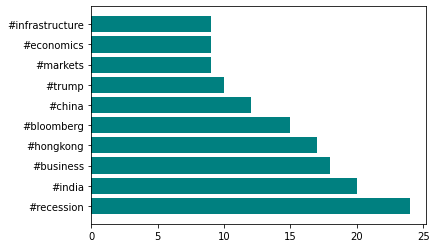

In [41]:
plt.barh(list(res2.keys()), list(res2.values()), color="teal")
plt.show()